# Question 3: Logistic Regression

In [21]:
#Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time



## Load the data

In [22]:
# load the data
# Perform important operations on the data
filename_0 = open('class0-input.csv')
filename_1 = open('class1-input.csv')
filename_2 = open('labels.csv')
x_0 = np.loadtxt(filename_0, delimiter=',', skiprows=1) #skips the first row which is the title 'x,y'
x_1 = np.loadtxt(filename_1, delimiter=',', skiprows=1)
y = np.loadtxt(filename_2, delimiter=',', skiprows=1)
filename_0.close()
filename_1.close()
filename_2.close()

x = np.concatenate((x_0, x_1), axis=0)
print(x)
print(x.shape)
y = y.reshape(-1,1)

print(y.shape)

[[-0.2015173  -0.68335816]
 [ 0.37451947 -0.82808223]
 [-0.16189468 -1.24710655]
 ...
 [ 2.32559622  4.18132864]
 [ 0.24707288  4.22940429]
 [ 1.71902244  4.82535048]]
(10000, 2)
(10000, 1)


## Check the shape

In [23]:
# Shape of X
# Shape of Y
n0,m0 = x.shape
n2, m2 = y.shape
print(n0,m0)
print(n2,m2)



10000 2
10000 1


## Visualize the data

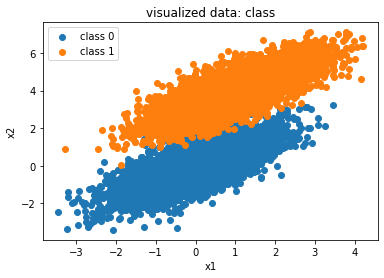

In [27]:
# Use different colors for each class
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
plt.figure()
plt.scatter(x_0[:,0], x_0[:,1])
plt.scatter(x_1[:,0], x_1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['class 0', 'class 1'])
plt.title('visualized data: class')
plt.show()

## Define the required functions

In [28]:
# Pass in the required arguments
# Implement the sigmoid function
def sigmoid():
    return 1/(1 + np.exp(-x))

In [29]:
def cost_function(weights, x, y):
    # assume x and y are in vector form
    # x = np.array([[1], [2], [3]])
    # y = np.array([[1], [2], [3]])
    # x = x.reshape(-1,1)
    n, m = x.shape
    x = np.concatenate([np.ones((n, 1)), x], axis=1)
    # theta = np.array([b0, b1])
    
    y_pred = x.dot(weights).reshape(-1,1)
    cost = (1/(2*n))* np.sum(np.square(y_pred-y))
    return cost

# Pass in the required arguments
# The function should return the gradients
def calculate_gradients(weights, x, y):
    n, m = x.shape
    X = np.concatenate([np.ones((n, 1)), x], axis=1)
    y_pred = X.dot(weights).reshape(-1,1)
    
    gradient = (1/n)*(x.T.dot(y_pred-y))
    return gradient[0][0]

In [30]:
# Update the weights using gradients calculated using above function and learning rate
# The function should return the updated weights to be used in the next step
def update_weights(prev_weights, current_grads, learning_rate):
    return prev_weights - (learning_rate*current_grads)

In [31]:
# Use the implemented functions in the main function
# 'main' fucntion should return weights after all the iterations
# Dont forget to divide by the number of datapoints wherever necessary!
# Initialize the intial weigths randomly
def main(X, Y, weights, learning_rate = 0.00005, num_steps = 50000):
    # cost_hist = []
    c_prev = np.inf
    for i in range(num_steps):
        current_grads = calculate_gradients(weights, x, y)
        weights = update_weights(weights, current_grads, learning_rate)
        cost = cost_function(weights, x, y)
        if c_prev-cost < 5e-7:
            return weights
        # c_prev = cost
        # cost_hist.append(cost)
    return weights


In [32]:
# Pass in the required arguments (final weights and input)
# The function should return the predictions obtained using sigmoid function.
def predict(x, weights):
    return sigmoid(np.dot(x, weights))   

In [39]:
# Use the final weights to perform prediction using predict funtion
# Convert the predictions to '0' or '1'
# Calculate the accuracy using predictions and labels
def calculate_accuracy(weights, x, y):
    n, m = x.shape
    X = np.concatenate([np.ones((n, 1)), x], axis=1)
    y_pred = X.dot(weights).reshape(-1,1)
    y_pred[np.where(y_pred > 0.5)] = 1
    y_pred[np.where(y_pred < 0.5)] = 0
    count = 0
    for i in range(y_pred.shape[0]):
        count += int(y_pred[i] == y[i])
    plt.figure()
    plt.scatter(x[:,0], x[:,1], c=y_pred)
    plt.xlabel('x1')
    plt.ylabel('x2')
    pop_b = mpatches.Patch(color='yellow', label='class 0')
    pop_a = mpatches.Patch(color='indigo', label='class 1')
    plt.title('Logistic Regression: no sklearn')
    plt.legend(handles=[pop_a,pop_b])
    plt.show()
    print("Accuracy is ",(float(count)/y_pred.shape[0]))


## Visualize the misclassification

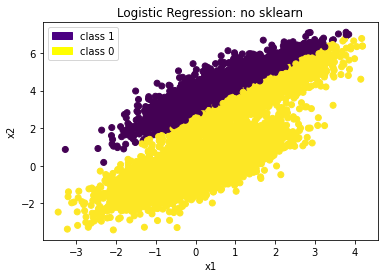

Accuracy is  0.1945


In [41]:
# Use different colors for class 0, class 1 and misclassified datapoints
# Use plt.scatter
# Dont forget to add axes titles, graph title, legend
weights = np.random.randint(0, 20, size=(m0+1))
weights = main(x, y, weights) 
calculate_accuracy(weights, x, y)

## Compare the results with sklearn's Logistic Regression

/home/tito/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy is  0.995


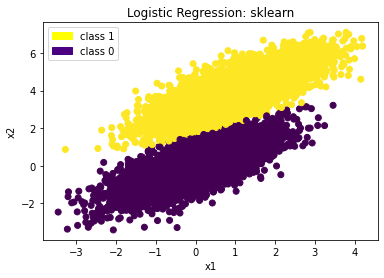

In [45]:
# import sklearn and necessary libraries
# Print the accuracy obtained by sklearn and your model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0, max_iter=50000)
model.fit(x, y)
y_pred = model.predict(x)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.xlabel('x1')
plt.ylabel('x2')
pop_a = mpatches.Patch(color='yellow', label='class 1')
pop_b = mpatches.Patch(color='indigo', label='class 0')
plt.title('Logistic Regression: sklearn')
plt.legend(handles=[pop_a,pop_b])
print("Accuracy is ", model.score(x,y))